In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision as tv

import numpy as np

import matplotlib.pyplot as plt

import cv2

from tqdm import tqdm

In [3]:
trans = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

In [4]:
ds_mnist = tv.datasets.MNIST('./datasets', download=True, transform=trans)

100%|██████████| 9912422/9912422 [00:21<00:00, 469164.18it/s] 


Extracting ./datasets\MNIST\raw\train-images-idx3-ubyte.gz to ./datasets\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 2065153.24it/s]

Extracting ./datasets\MNIST\raw\train-labels-idx1-ubyte.gz to ./datasets\MNIST\raw



100%|██████████| 1648877/1648877 [00:02<00:00, 563177.88it/s]


Extracting ./datasets\MNIST\raw\t10k-images-idx3-ubyte.gz to ./datasets\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./datasets\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./datasets\MNIST\raw



In [5]:
batch_size = 16
dataloader = torch.utils.data.DataLoader(
    ds_mnist, batch_size=batch_size, shuffle=True,
    num_workers=1, drop_last=True
)

In [6]:
class Neural_numbers(nn.Module):
  def __init__(self):
    super().__init__()
    self.flat = nn.Flatten()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 10)
    self.act = nn.ReLU()

  def forward(self, x):
    out = self.flat(x)
    out = self.linear1(out)
    out = self.act(out)
    out = self.linear2(out)

    return out

In [7]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [8]:
model = Neural_numbers()

In [9]:
loss_fn = nn.CrossEntropyLoss()

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

In [11]:
def accuracy(pred, label):
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
  
  return answer.mean()

In [12]:
epochs = 10

for epoch in range(epochs):
  loss_val = 0
  acc_val = 0

  for img, label in (pbar := tqdm(dataloader)):
    optimizer.zero_grad()
    
    label = F.one_hot(label, 10).float()
    pred = model(img)
    
    loss = loss_fn(pred, label)

    loss.backward()
    loss_item = loss.item()
    loss_val += loss_item

    optimizer.step()

    acc_current = accuracy(pred, label)
    acc_val += acc_current

    pbar.set_description(f'loss: {loss_item:.5f}\taccuracy: {acc_current:.3f}')
  
  print(f'epoch: {epoch}')
  print(f'loss: {loss_val/len(dataloader)}')
  print(f'accuracy: {acc_val/len(dataloader)}')

  0%|          | 0/3750 [00:00<?, ?it/s]C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\446236508.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
loss: 0.53696	accuracy: 0.812: 100%|██████████| 3750/3750 [00:32<00:00, 115.26it/s]


epoch: 0
loss: 0.633152640157938
accuracy: 0.8447833333333333


loss: 0.19958	accuracy: 1.000: 100%|██████████| 3750/3750 [00:32<00:00, 116.06it/s]


epoch: 1
loss: 0.3127941708276669
accuracy: 0.9114166666666667


loss: 0.22127	accuracy: 0.938: 100%|██████████| 3750/3750 [00:31<00:00, 118.56it/s]


epoch: 2
loss: 0.26476490879853565
accuracy: 0.92525


loss: 0.21792	accuracy: 0.938: 100%|██████████| 3750/3750 [00:29<00:00, 128.93it/s]


epoch: 3
loss: 0.22913280422339838
accuracy: 0.9350833333333334


loss: 0.18783	accuracy: 0.938: 100%|██████████| 3750/3750 [00:32<00:00, 116.93it/s]


epoch: 4
loss: 0.20119081073800724
accuracy: 0.94355


loss: 0.02754	accuracy: 1.000: 100%|██████████| 3750/3750 [00:29<00:00, 125.47it/s]


epoch: 5
loss: 0.17864423569887877
accuracy: 0.9499666666666666


loss: 0.33935	accuracy: 0.875: 100%|██████████| 3750/3750 [00:33<00:00, 112.45it/s]


epoch: 6
loss: 0.16060300274590653
accuracy: 0.9553166666666667


loss: 0.12612	accuracy: 1.000: 100%|██████████| 3750/3750 [00:34<00:00, 109.11it/s]


epoch: 7
loss: 0.1458175834181408
accuracy: 0.9590833333333333


loss: 0.05809	accuracy: 1.000: 100%|██████████| 3750/3750 [00:31<00:00, 118.58it/s]


epoch: 8
loss: 0.1336498366372039
accuracy: 0.9629


loss: 0.15452	accuracy: 0.938: 100%|██████████| 3750/3750 [00:28<00:00, 133.70it/s]

epoch: 9
loss: 0.12330514644968013
accuracy: 0.9654833333333334


In [13]:
def recognize_image(image_name):
    print(image_name)
    img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img)
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=0)
    img = img.astype(np.float32)/255.0

    t_img = torch.from_numpy(img)
    our_pred = model(t_img)

    print(F.softmax(our_pred).detach().numpy())
    print(F.softmax(our_pred).detach().numpy().argmax())

img0.png
[[9.8317820e-01 2.8036195e-06 4.0039458e-04 3.9744980e-04 3.4279226e-06
  7.4458792e-04 7.5639564e-06 1.1945757e-02 2.0624428e-04 3.1135855e-03]]
0


C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy())
C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy().argmax())


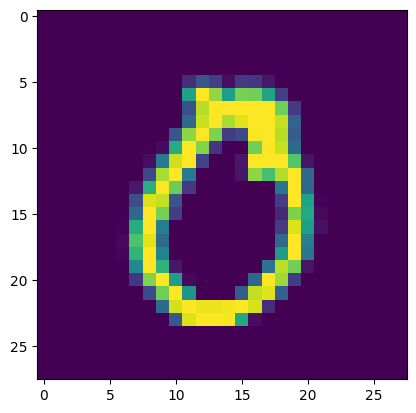

In [14]:
recognize_image(f'img{0}.png')

img1.png
[[8.7788743e-05 9.1357625e-01 6.5927645e-03 6.5987115e-03 8.2288962e-03
  1.7956994e-03 2.8115248e-03 5.0692763e-02 3.1694211e-03 6.4463383e-03]]
1


C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy())
C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy().argmax())


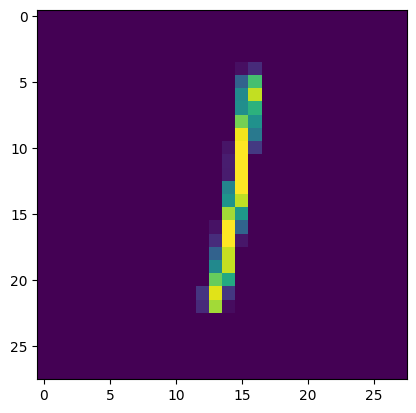

In [15]:
recognize_image(f'img{1}.png')

img2.png
[[7.4003235e-04 3.4944653e-05 9.3834794e-01 4.3593240e-03 1.9355010e-08
  5.4528227e-05 5.2896655e-07 3.5378916e-04 5.6094456e-02 1.4568307e-05]]
2


C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy())
C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy().argmax())


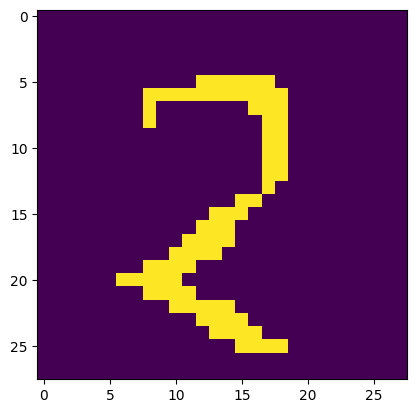

In [16]:
recognize_image(f'img{2}.png')

img3.png
[[1.2368880e-06 5.9555074e-05 5.6847061e-06 9.1559297e-01 1.6867451e-09
  8.4292844e-02 3.3542946e-09 7.4433468e-09 4.6120371e-05 1.5936699e-06]]
3


C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy())
C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy().argmax())


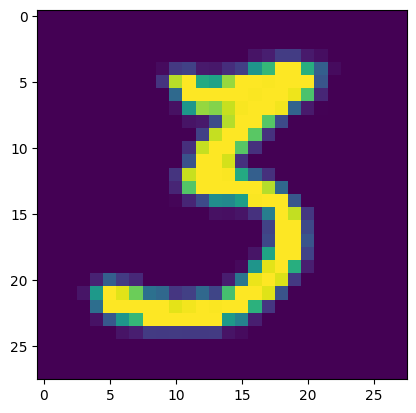

In [17]:
recognize_image(f'img{3}.png')

img4.png
[[6.5293250e-04 3.4444223e-04 2.3984851e-03 4.4640861e-03 9.1433382e-01
  1.6173054e-02 1.2707142e-02 5.2667102e-03 2.7371715e-03 4.0922083e-02]]
4


C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy())
C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy().argmax())


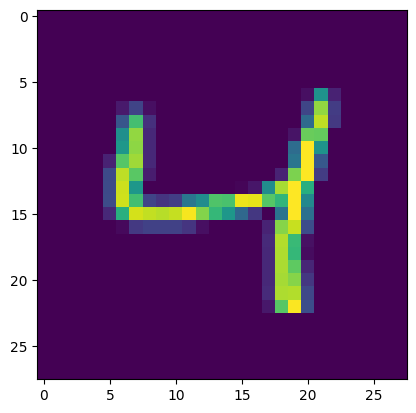

In [18]:
recognize_image(f'img{4}.png')

img5.png
[[1.5149663e-04 5.4935088e-05 2.1179831e-03 1.0235233e-02 1.0434296e-08
  9.8685247e-01 3.0309568e-06 4.2848766e-04 1.2964175e-04 2.6760486e-05]]
5


C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy())
C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy().argmax())


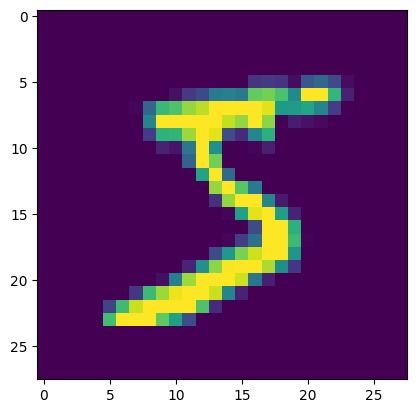

In [19]:
recognize_image(f'img{5}.png')

img6.png
[[2.15239954e-04 5.01378418e-06 7.94308539e-03 3.32697615e-04
  2.93374993e-03 5.07613062e-04 9.81730580e-01 4.97277215e-05
  6.16408233e-03 1.18205484e-04]]
6


C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy())
C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy().argmax())


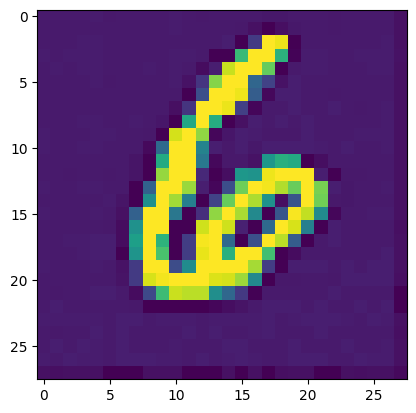

In [20]:
recognize_image(f'img{6}.png')

img7.png
[[1.8667868e-05 9.4367152e-08 8.1758836e-04 1.5137421e-03 4.9763102e-08
  9.9615427e-06 2.3622271e-10 9.9750668e-01 1.6315667e-05 1.1693015e-04]]
7


C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy())
C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy().argmax())


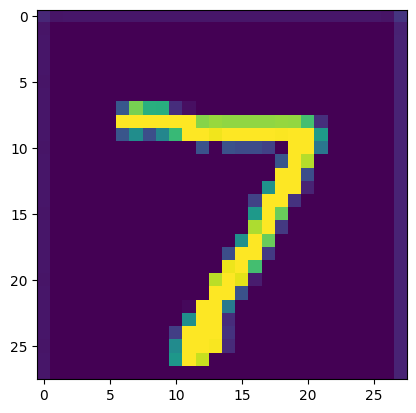

In [21]:
recognize_image(f'img{7}.png')

img8.png
[[1.0518918e-03 8.7829067e-05 3.8704786e-02 4.0412435e-01 1.6188884e-05
  3.2560511e-03 2.8327637e-05 2.2536363e-04 5.4329479e-01 9.2103919e-03]]
8


C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy())
C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy().argmax())


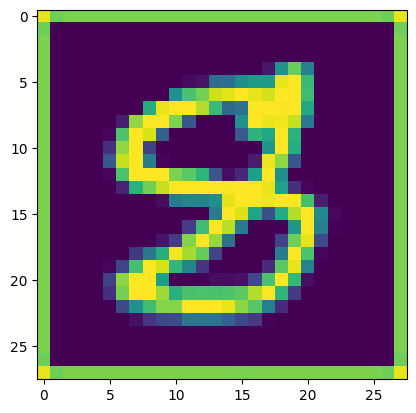

In [22]:
recognize_image(f'img{8}.png')

img9.png
[[1.1525208e-04 1.1699063e-07 5.8508151e-05 3.0094157e-05 7.0575788e-03
  2.7476302e-05 1.3035557e-06 6.4483811e-03 7.5021101e-04 9.8551106e-01]]
9


C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy())
C:\Users\jemel\AppData\Local\Temp\ipykernel_7868\1494229635.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(our_pred).detach().numpy().argmax())


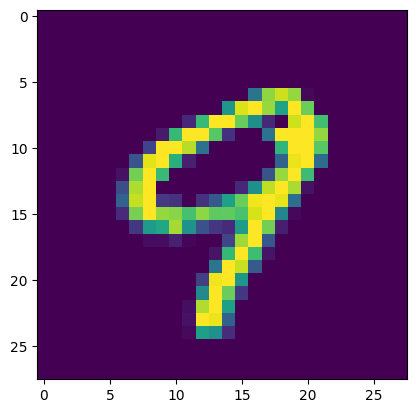

In [23]:
recognize_image(f'img{9}.png')